In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2

In [29]:
DPI = 120

### load the image

Text(0.5, 1.0, 'Input image')

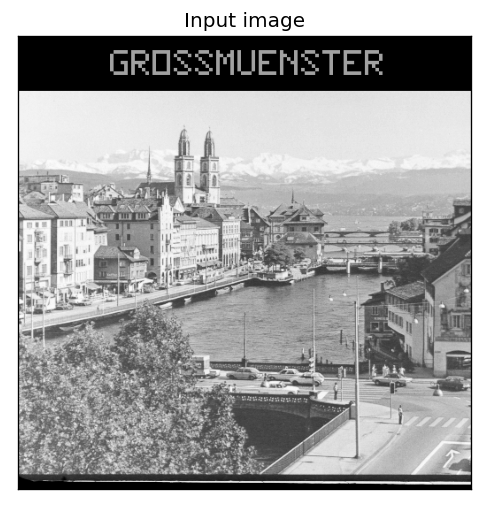

In [31]:
input_img=cv2.imread('inputs/grossmuenster.png', 0).astype('float')
plt.figure(figsize=(5, 5),dpi=DPI)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

### Gaussian blur the image

In [44]:
## TODO
blurred_img = ...

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.title('Blurred image')
plt.show()

### Use Sobel filter to compute gradient along x and y

In [34]:
## TODO
sobel_kernel = ...
I_x = ...
I_y = ...

### Compute gradient magnitude and direction

In [45]:
## TODO
magnitude = ...
direction = ...

plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(magnitude, cmap = 'gray')
plt.title('Gradient magnitude')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(direction, cmap=plt.cm.gray)
plt.title('Gradient direction')
plt.show()

### Threshold the edges

In [40]:
## TODO
thresh= ...
thresholdEdges = (magnitude > thresh)

### Apply NMS

In [41]:
## TODO
edges = ...

### Visualise the Canny edges

In [46]:
plt.figure(figsize=(12, 12),dpi=DPI)
plt.subplot(121)
plt.xticks([]), plt.yticks([])
plt.imshow(input_img, cmap = 'gray')
plt.title('Input image')

plt.subplot(122)
plt.xticks([]), plt.yticks([])
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('Canny Edge detector')
plt.show()